In [1]:
import math
from scipy.stats import norm
import pandas as pd
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, LogNorm
import numpy as np


R_Index  R_Values   Result
     e1    3.6150 0.105722
     e2    3.7850 0.100468
     e3    3.8850 0.097419
     e4    3.5450 0.107908
     e5    3.8550 0.098330
     e6    3.7050 0.102930
     e7    3.9625 0.095080
     e8    3.8625 0.098102
     e9    3.7900 0.100315
    e10    3.9750 0.094705
    e11    4.0100 0.093658
    e12    3.9250 0.096209


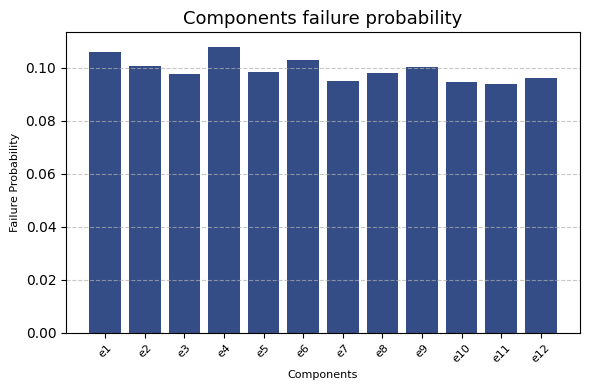

In [9]:
def calculate_expression(M, R):
    # Constants and parameters
    ln_part = math.log(0.59)
    constant_1 = 3.45078
    constant_2 = -1.36061
    constant_3 = 0.215873
    constant_4 = 6.14717
    constant_5 = 0.000733
    constant_6 = 0.02087
    constant_7 = 0.07224
    constant_8 = -0.137715
    sigma = 0.84

    # Calculate R component (Distance from the epicenter)
    R_component = math.sqrt(R**2 + constant_4**2)

    # Inner expression for failure probability
    inner_expression = (
        ln_part
        - constant_1
        - (constant_2 + constant_3 * (M - 5.5)) * math.log(R_component)
        + constant_5 * (R_component - 1)
        + constant_6 * (M - 6.75)
        + constant_7 * (M - 6.75)**2
        + constant_8
    )

    return norm.cdf(-inner_expression / sigma)

# Input values
M = 2.5
R_values = [3.615, 3.785, 3.885, 3.545, 3.855, 3.705, 3.9625, 3.8625, 3.79, 3.975, 4.01, 3.925]

# Calculate results for each R value
results = [calculate_expression(M, R) for R in R_values]

# Create DataFrame for results
df_results = pd.DataFrame({
    "R_Index": [f"e{i}" for i in range(1, len(R_values) + 1)],
    "R_Values": R_values,
    "Result": results
})
print(df_results.to_string(index=False))

# Visualize results as a bar chart
plt.figure(figsize=(6, 4))
plt.bar(df_results["R_Index"], df_results["Result"], color=(1/255, 33/255, 105/255), alpha=0.8)
plt.xlabel("Components", fontsize=8)
plt.ylabel("Failure Probability", fontsize=8)
plt.title("Components failure probability", fontsize=13)
plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Correlation coefficient between [1] and [2]: 0.104006
Correlation coefficient between [1] and [3]: 0.096951
Correlation coefficient between [1] and [4]: 0.102223
Correlation coefficient between [1] and [5]: 0.095732
Correlation coefficient between [1] and [6]: 0.095374
Correlation coefficient between [1] and [7]: 0.093276
Correlation coefficient between [1] and [8]: 0.093316
Correlation coefficient between [1] and [9]: 0.091305
Correlation coefficient between [1] and [10]: 0.091320
Correlation coefficient between [1] and [11]: 0.089362
Correlation coefficient between [1] and [12]: 0.087976
Correlation coefficient between [2] and [3]: 0.104119
Correlation coefficient between [2] and [4]: 0.103804
Correlation coefficient between [2] and [5]: 0.101709
Correlation coefficient between [2] and [6]: 0.099724
Correlation coefficient between [2] and [7]: 0.098456
Correlation coefficient between [2] and [8]: 0.097868
Correlation coefficient between [2] and [9]: 0.094501
Correlation coefficient b

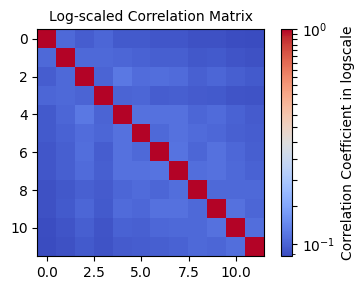

In [4]:
sigma_eta = 0.180904
sigma_eps = 0.276335
beta_e1 = beta_e2 = 0.84

def midpoint(lat1, lon1, lat2, lon2):
    """Calculate midpoint between two coordinates."""
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    bx = math.cos(lat2_rad) * math.cos(lon2_rad - lon1_rad)
    by = math.cos(lat2_rad) * math.sin(lon2_rad - lon1_rad)
    mid_lat_rad = math.atan2(
        math.sin(lat1_rad) + math.sin(lat2_rad),
        math.sqrt((math.cos(lat1_rad) + bx)**2 + by**2)
    )
    mid_lon_rad = lon1_rad + math.atan2(by, math.cos(lat1_rad) + bx)

    return math.degrees(mid_lat_rad), math.degrees(mid_lon_rad)

def calculate_midpoints(pairs):
    """Calculate midpoints for multiple coordinate pairs."""
    return [(i + 1, *midpoint(lat1, lon1, lat2, lon2)) for i, (lat1, lon1, lat2, lon2) in enumerate(pairs)]

def haversine(lat1, lon1, lat2, lon2):
    """Calculate distance between two coordinates using Haversine formula."""
    R = 6371  # Earth radius (km)
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2)**2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2)**2
    return 2 * R * math.atan2(math.sqrt(a), math.sqrt(1 - a))

def calculate_distances(midpoints):
    """Calculate distances between all pairs of midpoints."""
    return [
        (i1, i2, haversine(lat1, lon1, lat2, lon2))
        for (i1, lat1, lon1), (i2, lat2, lon2) in combinations(midpoints, 2)
    ]

def rho_e1e2(delta):
    """Compute rho based on distance delta."""
    return math.exp(-0.27 * delta**0.4)

def calculate_rho(midpoint_distances):
    """Calculate correlation coefficients for midpoint distances."""
    denominator_base = (beta_e1**2 + sigma_eta**2 + sigma_eps**2)
    return [
        (idx1, idx2, (sigma_eta**2 + rho_e1e2(delta) * sigma_eps**2) / math.sqrt(denominator_base**2))
        for idx1, idx2, delta in midpoint_distances
    ]

input_pairs = [
    (51.49358316888989, -0.2247402727476981, 51.512035659658984, -0.2245524574007228),
    (51.512035659658984, -0.2245524574007228, 51.52034355565668, -0.16980929985001988),
    (51.52034355565668, -0.16980929985001988, 51.5224687492703, -0.15764828450435267),
    (51.49358316888989, -0.2247402727476981, 51.49727964939653, -0.144660853088965),
    (51.5224687492703, -0.15764828450435267, 51.51440657311814, -0.14938752434799646),
    (51.51440657311814, -0.14938752434799646, 51.49727964939653, -0.144660853088965),
    (51.5224687492703, -0.15764828450435267, 51.532065084414796, -0.12346908868837017),
    (51.51440657311814, -0.14938752434799646, 51.51764899485022, -0.11984536532633182),
    (51.49727964939653, -0.144660853088965, 51.51113081653529, -0.0866320534378122),
    (51.51764899485022, -0.11984536532633182, 51.532065084414796, -0.12346908868837017),
    (51.532065084414796, -0.12346908868837017, 51.51804874291225, -0.08143500269290505),
    (51.51804874291225, -0.08143500269290505, 51.51113081653529, -0.0866320534378122)
]

output_midpoints = calculate_midpoints(input_pairs)
distances = calculate_distances(output_midpoints)
rho_values = calculate_rho(distances)

for idx1, idx2, rho in rho_values:
    print(f"Correlation coefficient between [{idx1}] and [{idx2}]: {rho:.6f}")

max_index = max(max(idx1, idx2) for idx1, idx2, _ in rho_values)
correlation_matrix = np.ones((max_index, max_index))

for idx1, idx2, rho in rho_values:
    correlation_matrix[idx1 - 1, idx2 - 1] = rho
    correlation_matrix[idx2 - 1, idx1 - 1] = rho

vmin = np.min(correlation_matrix)
vmax = np.max(correlation_matrix)
if vmax - vmin < 0.01:
    vmin -= 0.005
    vmax += 0.005

xticks_labels = [f'Component {i+1}' for i in range(correlation_matrix.shape[0])]
yticks_labels = [f'Component {j+1}' for j in range(correlation_matrix.shape[0])]

plt.figure(figsize=(4, 3))
im = plt.imshow(correlation_matrix, cmap='coolwarm', norm=LogNorm(vmin=vmin, vmax=vmax))
cbar = plt.colorbar(im)
cbar.set_label('Correlation Coefficient in logscale')
cbar.ax.yaxis.set_major_locator(plt.MaxNLocator(20))
plt.title("Log-scaled Correlation Matrix", fontsize=10)
plt.tight_layout()
plt.show()